In [43]:
# Dependencies
import json
import tweepy 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [32]:
# Variable for max_id
oldest_tweet = None

# Counter
counter = 1

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [33]:
#Storing the twitter ID list
twitterIDList = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes" ]

In [45]:
# Get all tweets from home feed
tweetList = []

for id in twitterIDList:
    counter = 1
    for x in range(1,6):
        print(oldest_tweet)
        public_tweets = api.user_timeline(id, max_id = oldest_tweet)
        for tweet in public_tweets:
            tweet_datetime = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            results = analyzer.polarity_scores(tweet["text"])
            tweetList.append({"News Channel": id,
                              "News Time" : tweet_datetime,
                              "News text": tweet["text"],
                              "Tweet ID" : tweet["id"],
                              "Sentiment" : results["compound"],
                              "Tweet Ago": counter})
            oldest_tweet = tweet['id'] - 1
            counter += 1

1012549984275836927
1012364151514189823
1012305691946770432
1012233091560214527
1012086866290663424
1012000896270716929
1011942253043077120
1011901471619796992
1011831547329236993
1011771058020585471
1011715709179744255
1011661259866025983
1011615536680185856
1011566671138566143
1011496798668640255
1011436384458977279
1011436384458977279
1011436384458977279
1011436384458977279
1011436384458977279
1011436384458977279
1011365182046719999
1011320660218535937
1011269054684975103
1011220224295755775


In [46]:
len(tweetList)
newsDf = pd.DataFrame(tweetList)
newsDf[newsDf["News Channel"] == "@CBSNews"]

,News Channel,News Time,News text,Sentiment,Tweet Ago,Tweet ID
100,@CBSNews,2018-06-27 15:29:47+00:00,"TEACHER TO THE END: In lieu of flowers, this t...",-0.3612,1,1011995012140322818
101,@CBSNews,2018-06-27 15:02:01+00:00,WATCH: Officials in Pittsburgh are giving an u...,-0.2263,2,1011988024492773377
102,@CBSNews,2018-06-27 14:44:33+00:00,Investigators arrested while probing Ivanka Tr...,-0.4767,3,1011983629877170176
103,@CBSNews,2018-06-27 14:29:58+00:00,NEW: East Pittsburgh Officer Michael Rosfeld h...,-0.8442,4,1011979958095372288
104,@CBSNews,2018-06-27 14:25:51+00:00,The 5-4 decision by the Supreme Court could de...,-0.1280,5,1011978923343798272
105,@CBSNews,2018-06-27 14:15:15+00:00,NEW: The Supreme has ruled that states can't f...,0.4939,6,1011976253564440576
106,@CBSNews,2018-06-27 14:14:44+00:00,Russia calls for retaliation against U.S. stee...,0.0000,7,1011976125743030272
107,@CBSNews,2018-06-27 13:59:56+00:00,Bargain basement bud: Pot shops in California ...,0.0772,8,1011972400186093571
108,@CBSNews,2018-06-27 13:45:01+00:00,Tracy Morgan warns his younger self about the ...,-0.3818,9,1011968647202590720
109,@CBSNews,2018-06-27 13:29:47+00:00,"Alexandria Ocasio-Cortez describes ""astonishin...",-0.3818,10,1011964813247950849


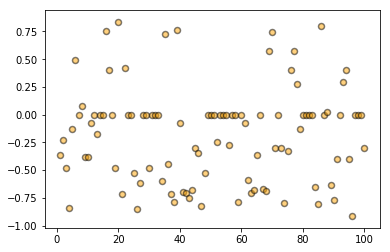

In [47]:
fig, ax = plt.subplots()
ax.scatter(newsDf[newsDf["News Channel"] == "@CBSNews"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@CBSNews"]['Sentiment'],  
           c='orange', 
           alpha=0.50, 
           linewidths = 1.5,
           edgecolor='black', 
           label='Urban')